In [31]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import transformers
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
model = AutoModelForTokenClassification.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
tokenizer = AutoTokenizer.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
metaphor_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def count_label_1(entities):
        count = 0
        for entity in entities:
            if entity['entity_group'] == 'LABEL_1':
                count += 1
        return count

df = pd.read_json('fitzgerald_babylon_annotated_v1.jsonl', lines=True)

df['model_labels'] = df['text'].apply(lambda x: metaphor_pipeline(x))

In [33]:
df['metaphor_counts'] = df['model_labels'].apply(count_label_1)
df['literal_or_metaphorical'] = np.where(df['metaphor_counts'] > 0, 'm', 'l')

In [34]:
df.head()

,label,sentence_number,text,model_labels,metaphor_counts,literal_or_metaphorical
0,l,1,And where's Mr. Campbell?,"[{'entity_group': 'LABEL_0', 'score': 0.999957...",0,l
1,l,2,Charlie asked.,"[{'entity_group': 'LABEL_0', 'score': 0.999983...",0,l
2,l,3,Gone to Switzerland.,"[{'entity_group': 'LABEL_0', 'score': 0.999958...",0,l
3,l,4,"Mr. Campbell's a pretty sick man, Mr. Wales.","[{'entity_group': 'LABEL_0', 'score': 0.998679...",0,l
4,l,5,I'm sorry to hear that.,"[{'entity_group': 'LABEL_0', 'score': 0.999972...",1,m


In [35]:
df['match'] = np.where(df['label'] == df['literal_or_metaphorical'], 'Yes', 'No')

In [36]:
df.head()

,label,sentence_number,text,model_labels,metaphor_counts,literal_or_metaphorical,match
0,l,1,And where's Mr. Campbell?,"[{'entity_group': 'LABEL_0', 'score': 0.999957...",0,l,Yes
1,l,2,Charlie asked.,"[{'entity_group': 'LABEL_0', 'score': 0.999983...",0,l,Yes
2,l,3,Gone to Switzerland.,"[{'entity_group': 'LABEL_0', 'score': 0.999958...",0,l,Yes
3,l,4,"Mr. Campbell's a pretty sick man, Mr. Wales.","[{'entity_group': 'LABEL_0', 'score': 0.998679...",0,l,Yes
4,l,5,I'm sorry to hear that.,"[{'entity_group': 'LABEL_0', 'score': 0.999972...",1,m,No


In [37]:
counts = df['match'].value_counts(normalize=True) * 100
counts

Yes    55.940594
No     44.059406
Name: match, dtype: float64

In [38]:
df['mismatch'] = np.where((df['label'] == 'm') & (df['literal_or_metaphorical'] == 'Yes'), 'mismatch_m', 
                 np.where((df['label'] == 'l') & (df['literal_or_metaphorical'] == 'No'), 'mismatch_l', 'match'))

mismatch_counts = df['mismatch'].value_counts()

mismatches_m = 0
if 'mismatch_m' in mismatch_counts:
    mismatches_m = mismatch_counts['mismatch_m']

mismatches_l = 0
if 'mismatch_l' in mismatch_counts:
    mismatches_l = mismatch_counts['mismatch_l']

if mismatches_m > mismatches_l:
    print("Most mismatches are for label 'm'")
elif mismatches_m < mismatches_l:
    print("Most mismatches are for label 'l'")
else:
    print("Equal number of mismatches for both labels")

Equal number of mismatches for both labels


In [39]:
print(mismatches_m)
print(mismatches_l)

0
0


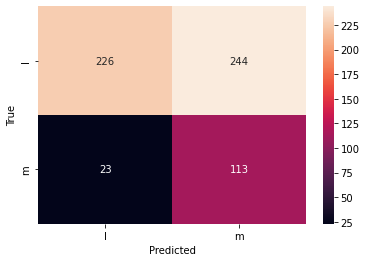

In [40]:
y_true = df['label']
y_pred = df['literal_or_metaphorical']

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['l', 'm'], yticklabels=['l', 'm'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [41]:
df['literal_or_metaphorical'].unique()

array(['l', 'm'], dtype=object)

In [42]:
pd.set_option('display.max_rows', 1000)

In [43]:
rows = y_true[y_true == '1'].index.tolist()
rows

[]

In [44]:
print(y_true.unique())

['l' 'm']
